In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import copy
%matplotlib inline

In [2]:
X= pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/train/train_features_sent.csv")

In [3]:
y= pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/train/train_labels_sent.csv")

In [4]:
X.describe()

,level_0,altitude,area_code,building_height_ft,building_total_area_sqft,building_use_type_code,building_year,living_area_sqft,lowe_floor_thermal_conductivity,nb_commercial_units,...,nb_power_meters_commercial,nb_power_meters_housing,nb_power_meters_total,nb_units_total,outer_wall_thermal_conductivity,percentage_glazed_surfaced,post_code,upper_floor_thermal_conductivity,window_heat_retention_factor,window_thermal_conductivity
count,1.010684e+06,992545.000000,1.010684e+06,994468.000000,949721.000000,1.010684e+06,951235.000000,1.010672e+06,933373.000000,116104.000000,...,95221.000000,95221.000000,95221.000000,116104.000000,1.003326e+06,882511.000000,1.010684e+06,964886.000000,988325.000000,1.005579e+06
mean,7.540240e+05,453.935478,5.175532e+02,20.006577,1642.593517,1.227803e+00,1973.982554,1.227738e+03,3.308581,16.903409,...,0.083716,26.063373,25.516544,104.102666,4.687868e+00,0.827719,5.102518e+07,2.237627,1.247048,1.714496e+01
std,4.356355e+05,513.079778,2.387919e+02,12.960314,1963.887500,5.607223e-01,38.921732,2.496711e+03,0.720945,91.571939,...,0.465804,44.429343,44.207655,317.412876,3.063425e+00,0.176220,2.427389e+07,0.852095,0.569495,5.779591e+00
min,0.000000e+00,-9.842520,1.090000e+02,0.000000,64.583400,1.000000e+00,1200.000000,0.000000e+00,2.282947,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.088024e+00,0.310000,1.000122e+07,1.488072,0.243582,2.780761e+00
25%,3.768322e+05,124.671920,3.040000e+02,12.795276,882.639800,1.000000e+00,1964.000000,7.965286e+02,2.797533,0.000000,...,0.000000,6.760000,6.450000,12.000000,2.447516e+00,0.720170,3.034212e+07,1.770545,1.084204,1.396372e+01
50%,7.536310e+05,295.275600,5.200000e+02,17.060368,1205.556800,1.000000e+00,1979.000000,1.022571e+03,2.844251,0.000000,...,0.000000,15.000000,15.000000,32.000000,2.944443e+00,0.786523,5.049011e+07,1.890570,1.133072,1.605727e+01
75%,1.131399e+06,597.112880,7.040000e+02,22.637796,1646.876700,1.000000e+00,1999.000000,1.334724e+03,4.070746,8.000000,...,0.000000,30.000000,29.000000,87.000000,5.515635e+00,0.886707,7.200292e+07,2.201487,1.212343,1.901402e+01
max,1.508482e+06,6167.979200,9.520000e+02,511.811040,230444.335100,5.000000e+00,2019.000000,3.815157e+05,5.960612,10874.000000,...,35.000000,4463.000000,4490.230000,42317.350000,2.652868e+01,1.998632,9.992662e+07,5.547723,15.891206,2.122490e+02


In [5]:
X.isnull().sum()

level_0                              0
additional_heat_generators           0
additional_water_heaters        800690
altitude                         18139
area_code                            0
                                 ...  
window_frame_material              404
window_glazing_type               5135
window_heat_retention_factor     22359
window_orientation                   0
window_thermal_conductivity       5105
Length: 71, dtype: int64

In [10]:
fl_cols = list(X.columns[X.dtypes=="float64"])  # numerical
int_cols = list(X.columns[X.dtypes=="int64"]) # categorical
num=fl_cols+int_cols
categ=list(X.columns[X.dtypes=="object"])
boole=list(X.columns[X.dtypes=="bool"])
num

['altitude',
 'building_height_ft',
 'building_total_area_sqft',
 'building_year',
 'living_area_sqft',
 'lowe_floor_thermal_conductivity',
 'nb_commercial_units',
 'nb_gas_meters_commercial',
 'nb_gas_meters_housing',
 'nb_gas_meters_total',
 'nb_housing_units',
 'nb_meters',
 'nb_parking_spaces',
 'nb_power_meters_commercial',
 'nb_power_meters_housing',
 'nb_power_meters_total',
 'nb_units_total',
 'outer_wall_thermal_conductivity',
 'percentage_glazed_surfaced',
 'upper_floor_thermal_conductivity',
 'window_heat_retention_factor',
 'window_thermal_conductivity',
 'level_0',
 'area_code',
 'building_use_type_code',
 'nb_dwellings',
 'post_code']

In [40]:
df=copy.deepcopy(X)
df['energy_consumption_per_annum']=y['energy_consumption_per_annum']

### Investigating numerical features

### data distribution 

<AxesSubplot:xlabel='energy_consumption_per_annum', ylabel='Density'>

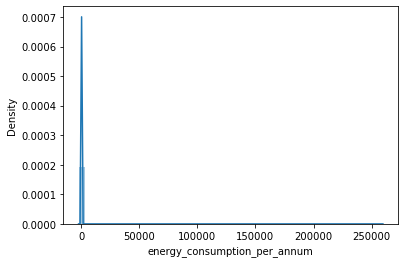

In [41]:
sns.distplot(y["energy_consumption_per_annum"])

In [42]:
print("Skewness: %f" % y['energy_consumption_per_annum'].skew())
print("Kurtosis: %f" % y['energy_consumption_per_annum'].kurt())

Skewness: 287.023251
Kurtosis: 85647.460850


<AxesSubplot:xlabel='altitude', ylabel='Density'>

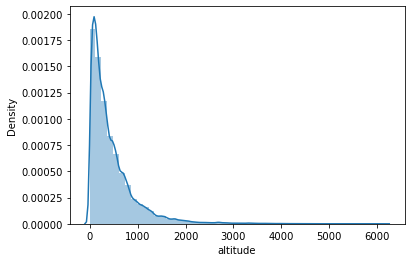

In [43]:
sns.distplot(df["altitude"])

<AxesSubplot:xlabel='building_height_ft', ylabel='Density'>

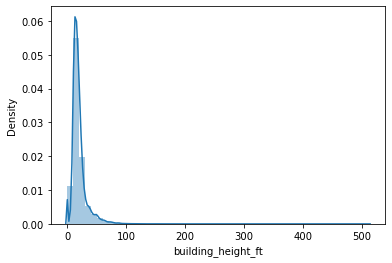

In [16]:
sns.distplot(df["building_height_ft"])

<AxesSubplot:xlabel='building_total_area_sqft', ylabel='Density'>

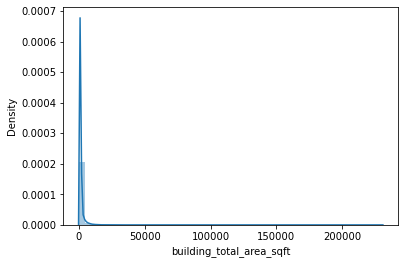

In [17]:
sns.distplot(df["building_total_area_sqft"])

<AxesSubplot:xlabel='outer_wall_thermal_conductivity', ylabel='Density'>

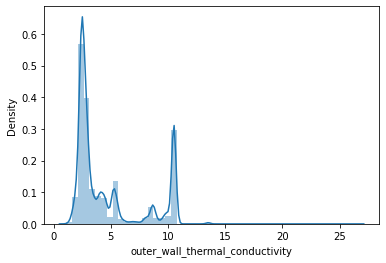

In [18]:
sns.distplot(df["outer_wall_thermal_conductivity"])

<AxesSubplot:xlabel='percentage_glazed_surfaced', ylabel='Density'>

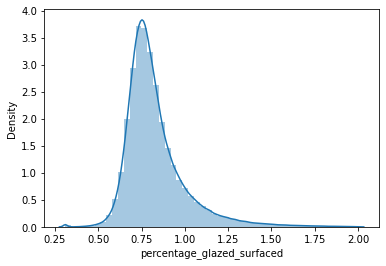

In [19]:
sns.distplot(df["percentage_glazed_surfaced"])

<AxesSubplot:xlabel='upper_floor_thermal_conductivity', ylabel='Density'>

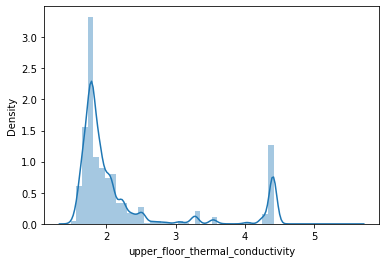

In [21]:
sns.distplot(df["upper_floor_thermal_conductivity"])

<AxesSubplot:xlabel='percentage_glazed_surfaced', ylabel='Density'>

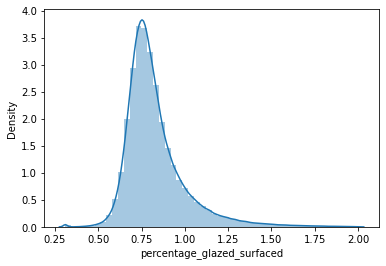

In [22]:
sns.distplot(df["percentage_glazed_surfaced"])

### investigating relationship between features and labels

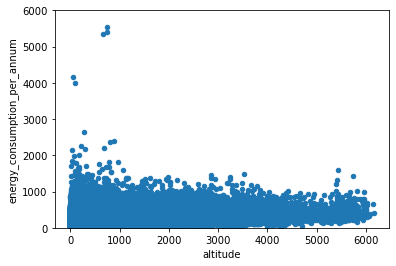

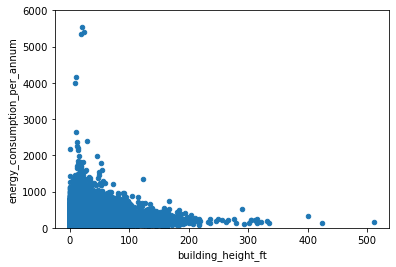

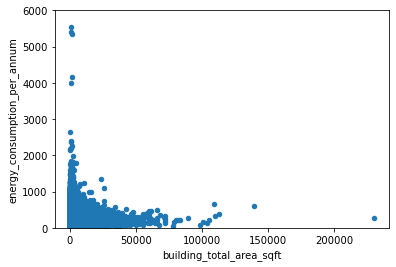

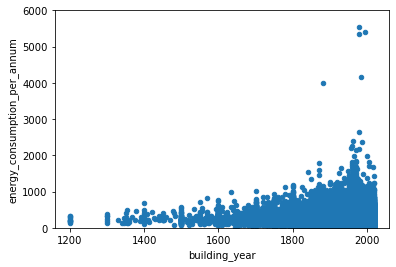

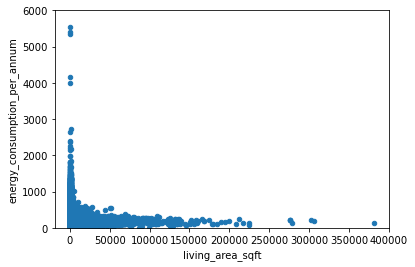

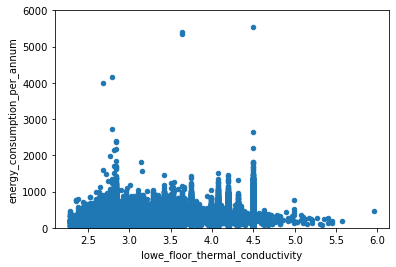

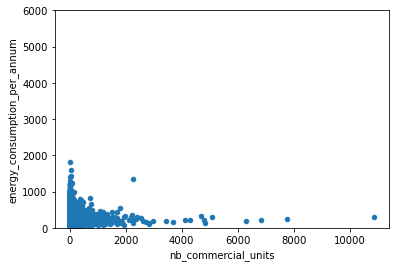

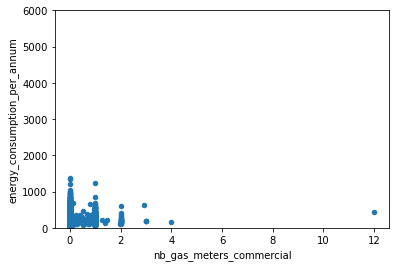

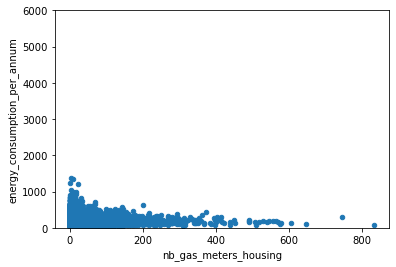

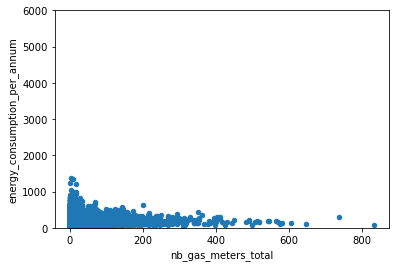

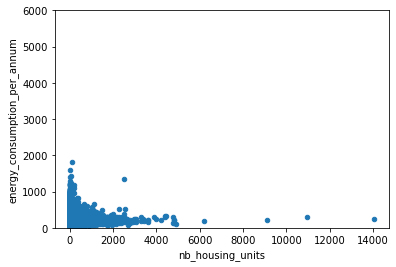

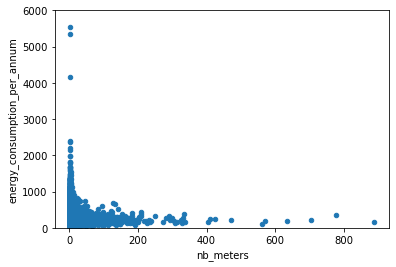

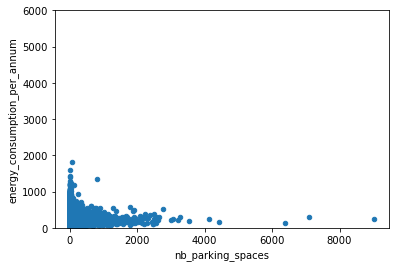

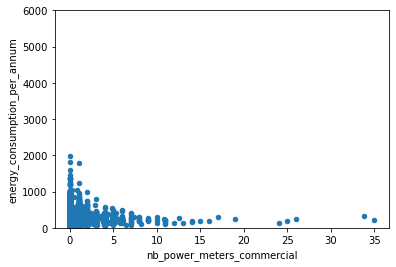

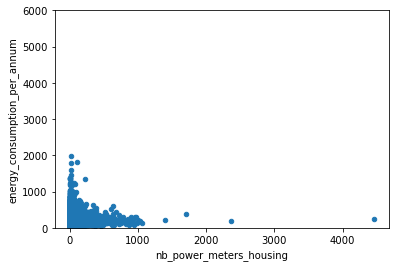

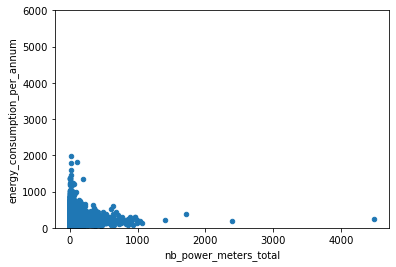

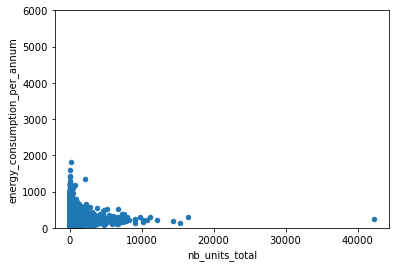

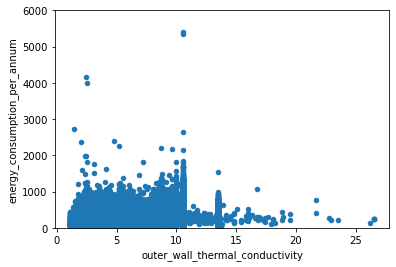

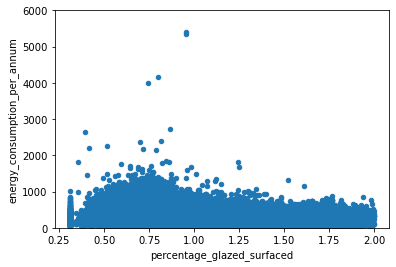

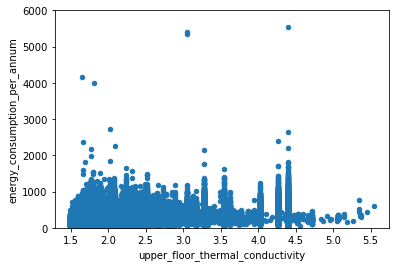

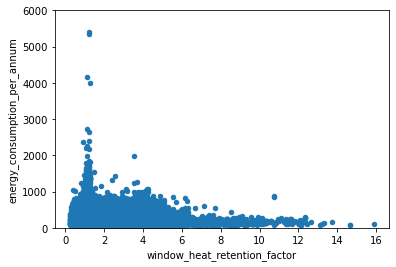

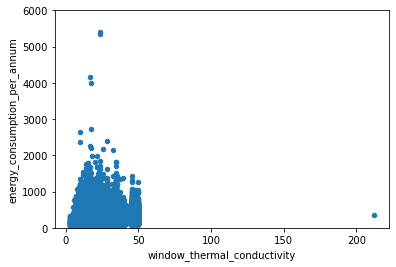

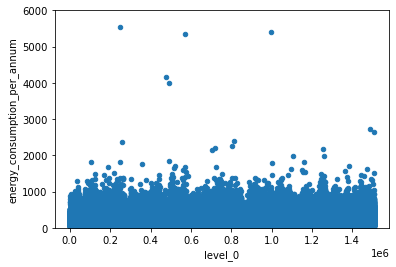

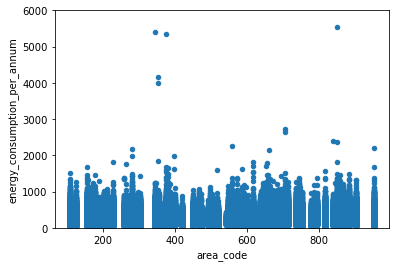

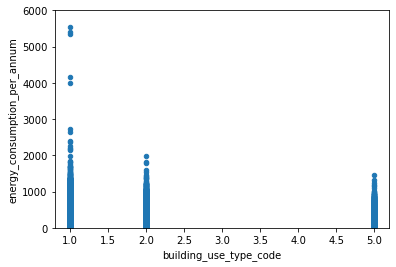

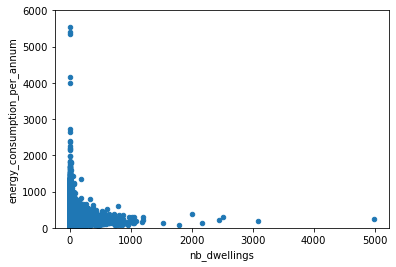

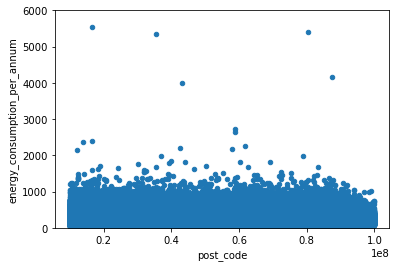

In [23]:
for c in num:
    var = c
    data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
    data.plot.scatter(x=var, y='energy_consumption_per_annum', ylim=(0,6000))

### Investigating categorical features

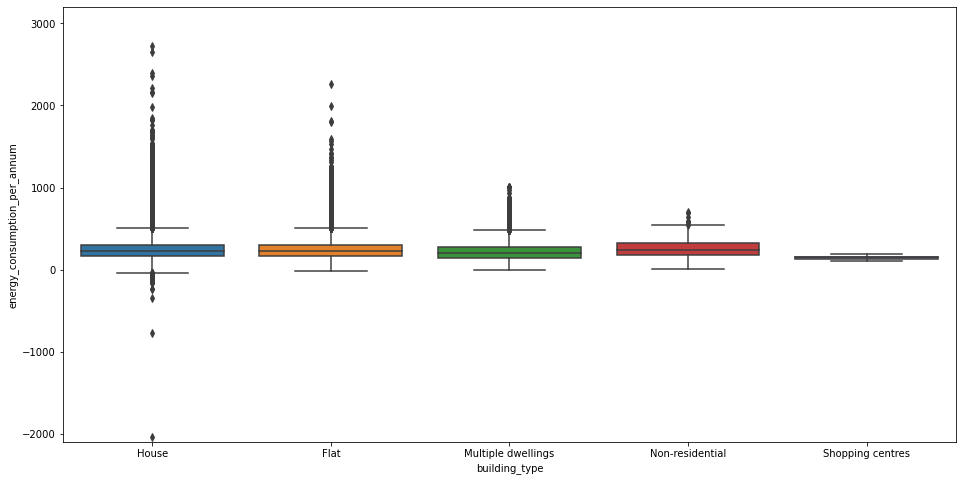

In [28]:
var = 'building_type'
data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.ylim(-2100,3200)
fig = sns.boxplot(x=var, y="energy_consumption_per_annum", data=data)

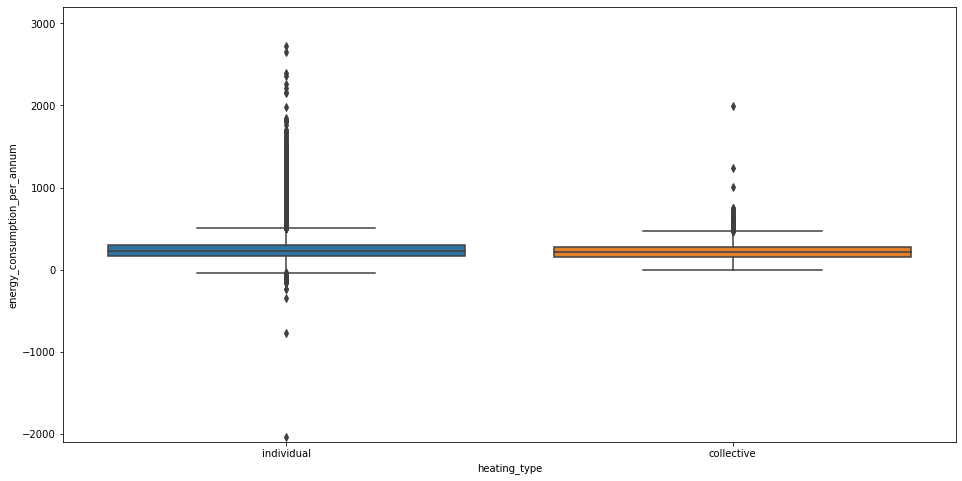

In [29]:
var = 'heating_type'
data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.ylim(-2100,3200)
fig = sns.boxplot(x=var, y="energy_consumption_per_annum", data=data)

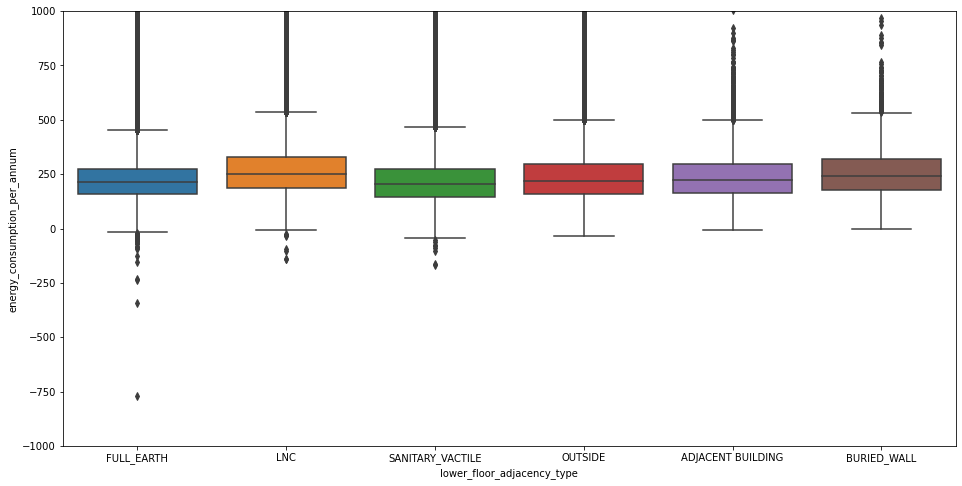

In [30]:
var = 'lower_floor_adjacency_type'
data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.ylim(-1000,1000)
fig = sns.boxplot(x=var, y="energy_consumption_per_annum", data=data)

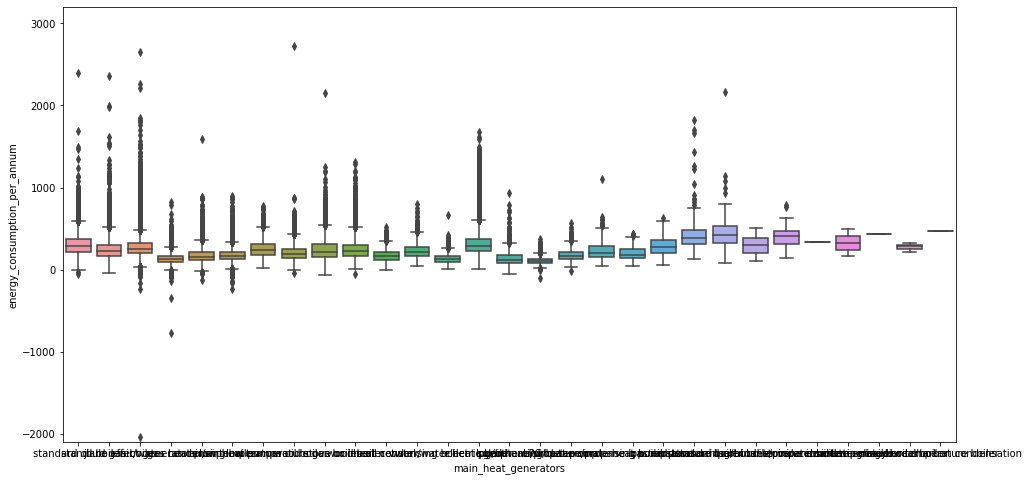

In [31]:
var = 'main_heat_generators'
data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.ylim(-2100,3200)
fig = sns.boxplot(x=var, y="energy_consumption_per_annum", data=data)

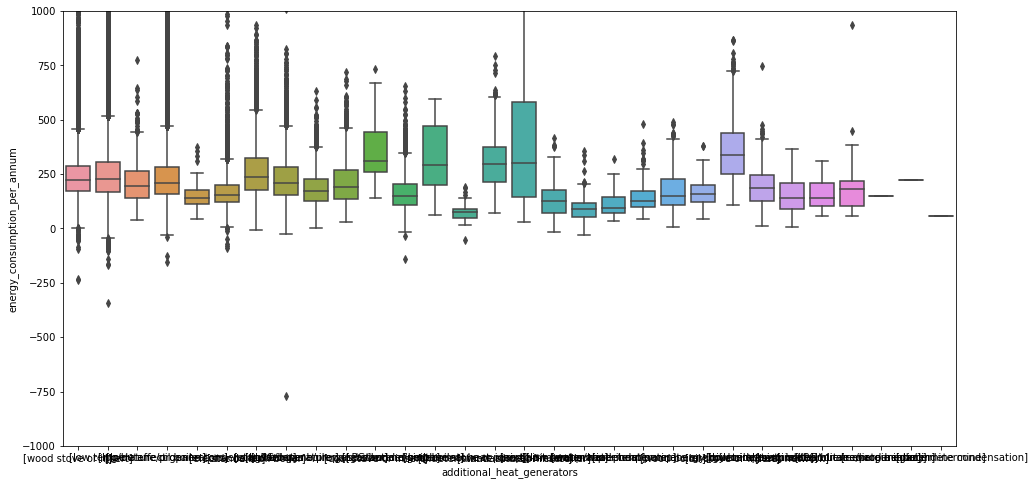

In [32]:
var ='additional_heat_generators'
data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.ylim(-1000,1000)
fig = sns.boxplot(x=var, y="energy_consumption_per_annum", data=data)

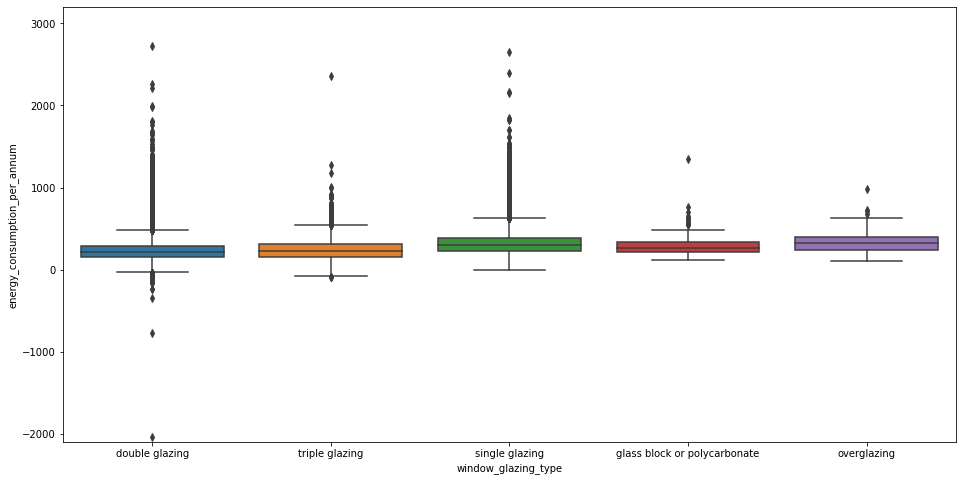

In [33]:
var = 'window_glazing_type'
data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.ylim(-2100,3200)
fig = sns.boxplot(x=var, y="energy_consumption_per_annum", data=data)

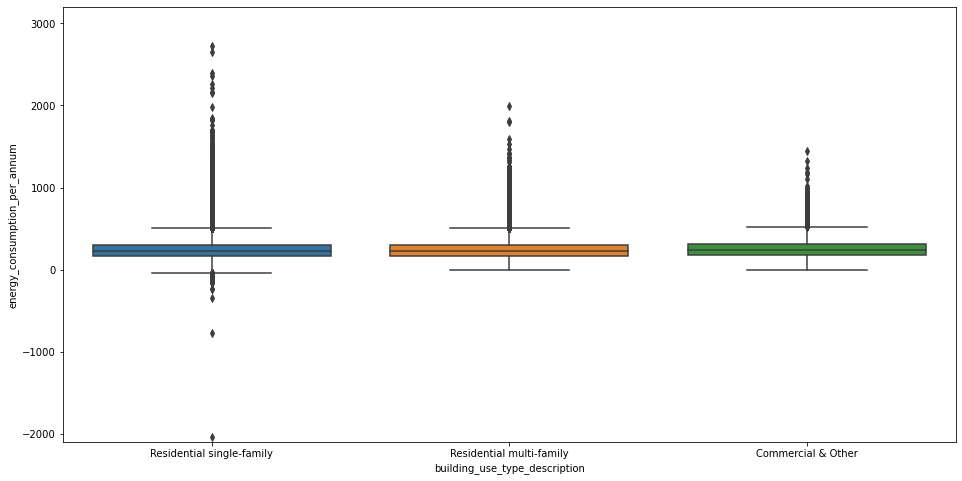

In [34]:
var = 'building_use_type_description'
data = pd.concat([y['energy_consumption_per_annum'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.ylim(-2100,3200)
fig = sns.boxplot(x=var, y="energy_consumption_per_annum", data=data)

### log transformation - New distribution

We can see that the majority of the features are right skewed. So we'll apply log transformation to normalize it before training deep neural networks.

In [45]:
fl_cols = list(df.columns[df.dtypes=="float64"]) 
fl_cols

['altitude',
 'building_height_ft',
 'building_total_area_sqft',
 'building_year',
 'living_area_sqft',
 'lowe_floor_thermal_conductivity',
 'nb_commercial_units',
 'nb_gas_meters_commercial',
 'nb_gas_meters_housing',
 'nb_gas_meters_total',
 'nb_housing_units',
 'nb_meters',
 'nb_parking_spaces',
 'nb_power_meters_commercial',
 'nb_power_meters_housing',
 'nb_power_meters_total',
 'nb_units_total',
 'outer_wall_thermal_conductivity',
 'percentage_glazed_surfaced',
 'upper_floor_thermal_conductivity',
 'window_heat_retention_factor',
 'window_thermal_conductivity',
 'energy_consumption_per_annum']

In [47]:
for c in fl_cols:
    df[c]=np.log(df[c])

<AxesSubplot:xlabel='energy_consumption_per_annum', ylabel='Density'>

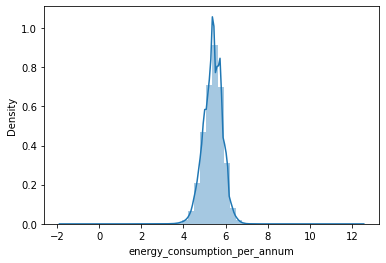

In [49]:
sns.distplot(df['energy_consumption_per_annum'])

<AxesSubplot:xlabel='window_thermal_conductivity', ylabel='Density'>

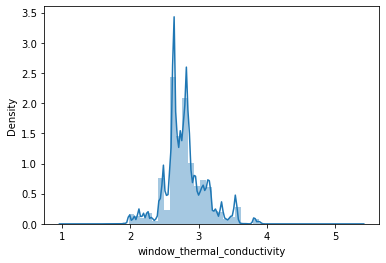

In [51]:
sns.distplot(df['window_thermal_conductivity'])

<AxesSubplot:xlabel='outer_wall_thermal_conductivity', ylabel='Density'>

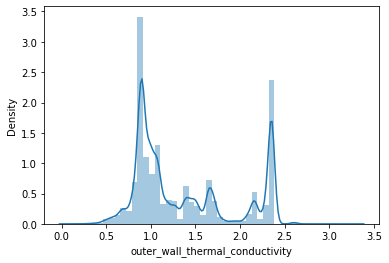

In [55]:
sns.distplot(df['outer_wall_thermal_conductivity'])

<AxesSubplot:xlabel='window_heat_retention_factor', ylabel='Density'>

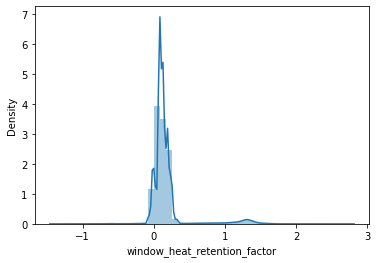

In [59]:
sns.distplot(df['window_heat_retention_factor'])

<AxesSubplot:xlabel='percentage_glazed_surfaced', ylabel='Density'>

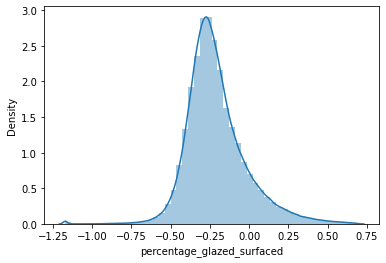

In [60]:
sns.distplot(df['percentage_glazed_surfaced'])

### Correlations

<AxesSubplot:>

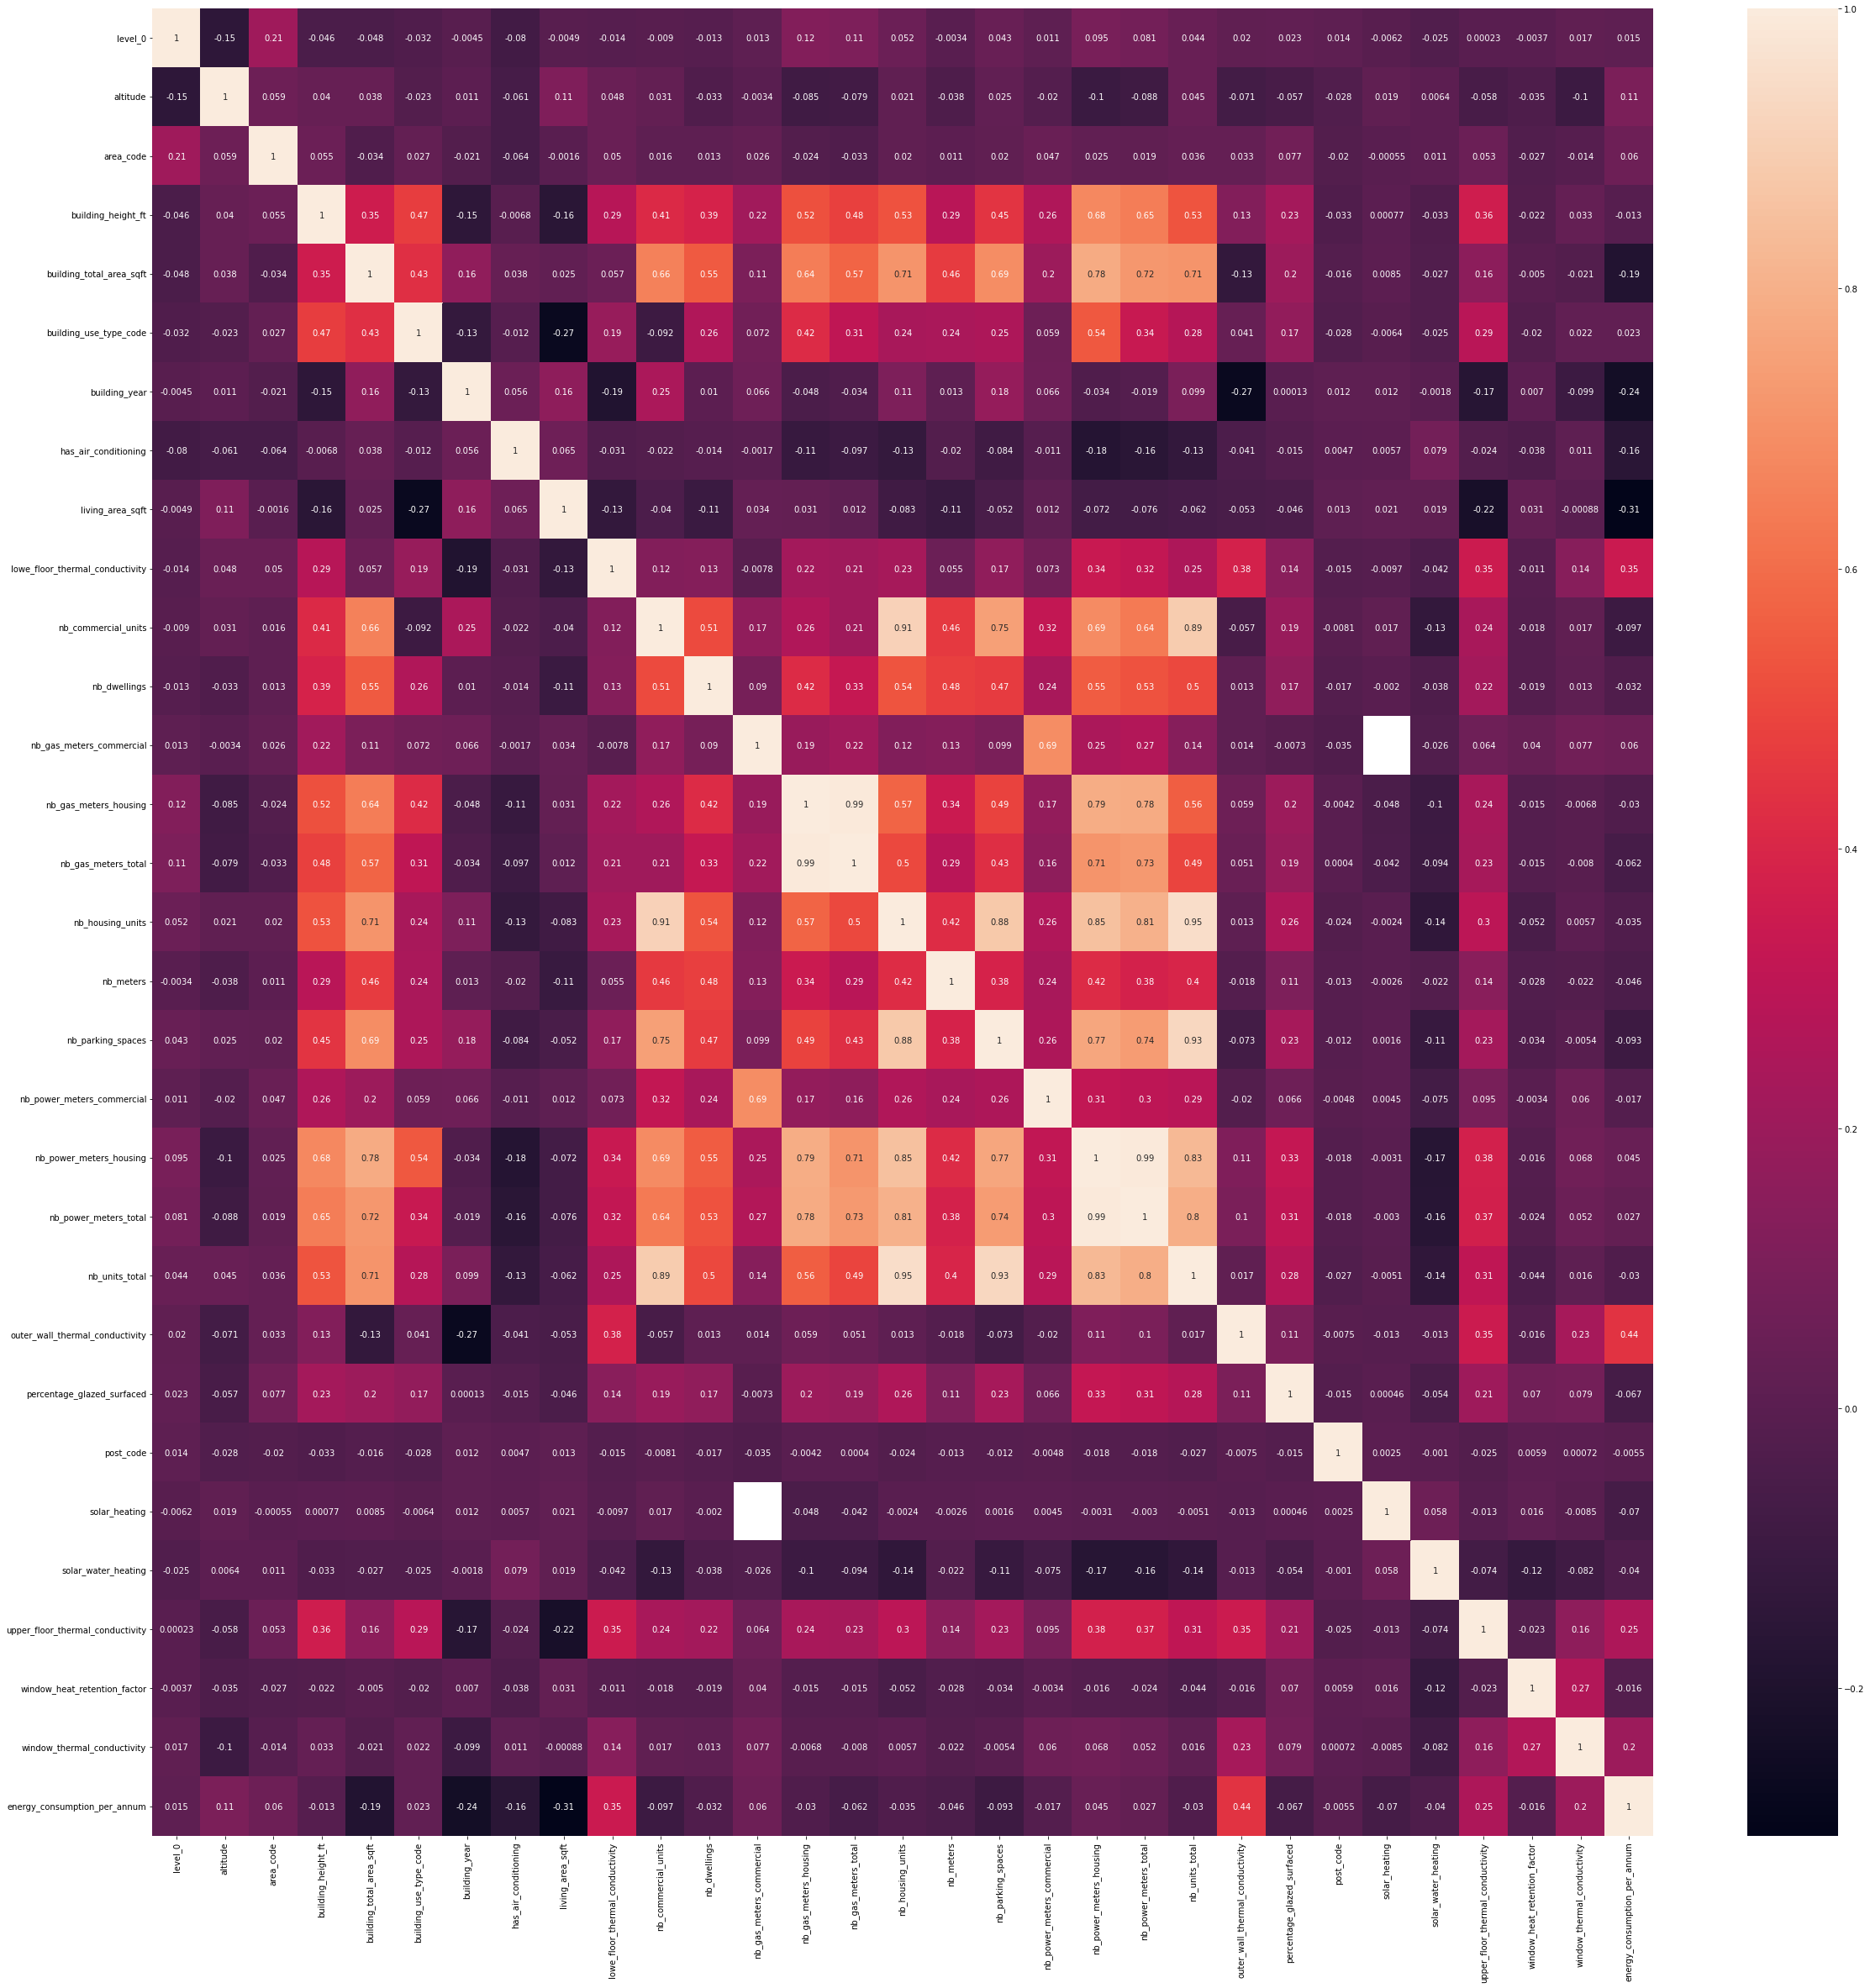

In [63]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)